# Stonks: A Reddit Story
Andrew DeCandia, Emma Fox, Shamama Sirroon

## Introduction
In recent years, there has been much discussion on how to play the stock market - not just for financial consultants, but for everyday investors as well. The [rise of stock trading apps](https://www.statista.com/statistics/1259908/etrading-app-downloads-usa/) has made investing more independent and accessible to millions of people, particularly [younger adults](https://www.wesh.com/article/more-young-people-stocks-investing-stimulus-funds/35868167#). So many investors want to "beat the stock market" by having their stocks perform better than the market average, so they're always on the lookout for new trends, strategies, and companies to improve their portfolios.

One hub of investment discussion is [/r/wallstreetbets](https://www.reddit.com/r/wallstreetbets_/hot/), which allows Reddit users, or Redditors, to suggest stocks to buy and create investment strategies with other Redditors. It has made national news multiple times in the past few years for its contribution to the sudden rise of [Gamestop (GME)](https://www.theguardian.com/business/2021/jan/28/gamestop-how-reddits-amateurs-tripped-wall-streets-short-sellers), [AMC](https://markets.businessinsider.com/news/stocks/amc-short-seller-losses-stock-price-surge-8-day-rally-2021-6-1030491645), and other "meme stocks." However, much of the subreddit's success in these cases has been due to its ability to mobilize millions of users more than its choice of stock. We wanted to determine whether /r/wallstreetbets gives accurate predictions to what stocks are a good investment, especially on a longer timescale, so our research question for this project became: **Does the stock-buying advice from /r/wallstreetbets actually beat the market?**

By determining whether the subreddit was trustworthy, we could determine if following its advice would be profitable, as well as understand how the users on the /r/wallstreetbets understand stocks. 

For the purposes of our research, we defined "beating the market" as having a higher return on investment (ROI) than the Standard and Poor's 500 Index, or the S&P500, which is a widely used indicator of overall market trends. We chose ROI as our unit of measurement because it simply illustrates to investors what percent of their investment they can expect to earn back. We ran into an issue where we could not pull data for the S&P500, so we used SPY, an exchange-traded fund (ETF) which invests in the same stocks. We also chose to only look at subreddit posts from the year 2018, before COVID-19 affected the stock market.

To answer our question of how accurate /r/wallstreetbets predictions for stock prices are, we obtained data from Reddit by using the Pushshift API and the Pushshift Multithreaded API Wrapper (PMAW). We found all of the ticker symbols in the posts and used Alpaca Market's Alpaca API to obtain data on the stock prices for these stocks. Alpaca Market is a stock-trading API and contains stock information that it obtains from [IEX](https://exchange.iex.io/), a stock exchange. We then compared the Reddit users' favored stocks versus the S&P500's for exactly one year. Whichever one of the two options gave us a higher return on investment (ROI) would be the superior investment method.

In [10]:
# run the following code when first running the notebook to update any changes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Methodology

In [22]:
# import the functions needed to graph data
from generate_results import generate_results

Our first step involved obtaining Reddit posts, specifically the titles, the body text, and the dates they were posted. We specified the subreddit, the number of posts we would like, and the dates that we would like information from in the [Pushshift API](https://reddit-api.readthedocs.io/en/latest/). This is outputted as a dictionary of lists. Unfortunately, we were not able to get as many Reddit posts as we would have liked, so we had to add [PMAW](https://pypi.org/project/pmaw/), a wrapper that allowed us to call the Pushshift API multiple times to obtain more Reddit data. While this data was less nicely ordered, the wrapper allowed us to obtain 66,822 Reddit submissions prior to filtering.

We used Pandas to store our data in dataframes, which made it easier to append to the existing information and sort the posts by date posted. We saved all the data to a Comma-Separated Values (CSV) file that we could later read and pull information from.

We then modified and filtered our Reddit data to only contain the information we needed. We changed the date from UTC format into a datetime type, and we searched all posts and titles for any stock names that we found using a few regular expressions. We searched for any dollar signs followed by capital letters and added those tickers to a dictionary representing the tickers in each post. We also searched for the keyword "long", which indicated that Redditors believed the stock would increase in value, and we filtered out any posts with question marks as those posts tended to be asking questions about stocks rather than recommending any. We also got rid of any posts with the word "short", as some posts said to long one stock and short another, and we did not want to assume both stocks were predicted to increase.

We checked for duplicates by comparing each new ticker to a list of previous tickers. If the ticker was not in `existing_tickers`, it was appended to the list, and if it was in the list, the ticker was removed from the overall list containing all tickers per post. If there were no new tickers in a post, the row was removed to prevent further errors.

We then went on to obtaining data from [Alpaca Markets](https://pypi.org/project/alpaca-trade-api/). We did this by utilizing `alpaca_trade_api`, which takes three inputs: the start date and end date of the stock that we would like to get information for and the stock ticker. It outputted the stock prices for every day between the start and end days (inclusive) in a csv file that we used later to graph our information. To graph our stock data, we set our x-coordinates to be time, and our y-coordinates to be the prices of the stocks at each date. We determined the slope of the lines between each point, and colored them green where the price was increasing and red where the price was decreasing.

To evaluate the results of Reddits suggestions, we decided to compare the Reddit stocks annual return with the S&P 500, a proxy for the stock market. This means finding the ROI of each stock recommended by Reddit and the ROI of SPY, an ETF that copies the S&P 500, over the time period of one year after the Reddit post was made. We then averaged the Reddit stock and SPY annual return which we can compare directly. A higher annual return is better.

Regarding the Reddit data, we pulled data from each row of the CSV as a namedtuple. This unfortunately converts the list of stock tickers to a string, so we split the string back into a list of individual stock tickers. Then we could loop through all the unique tickers from each post. We checked that the tickers were valid by seeing if we could pull a small amount of data from the alpaca API, and if that worked we pulled a years worth of data from 

We created graphs for both the S&P500 and Reddit recommended stocks, starting at the time of the post to create a valid comparison. To determine ROI, we found the starting and ending prices for each, took the difference, divided by the initial price, and multiplied by 100, giving us a percent.

# Results

Over the course of a year, we found:
* Number of stocks recommended by reddit:  305
* Average Reddit ROI: 1.44%
* Number of recommended stocks in the S&P 500:  83
* Average S&P ROI: 3.65%

These results show that Reddit is not a more reliable source than the S&P, as the average ROI is lower.
To visualize these results, we created multiple graphs showcasing specific stock prices over time, shown below.

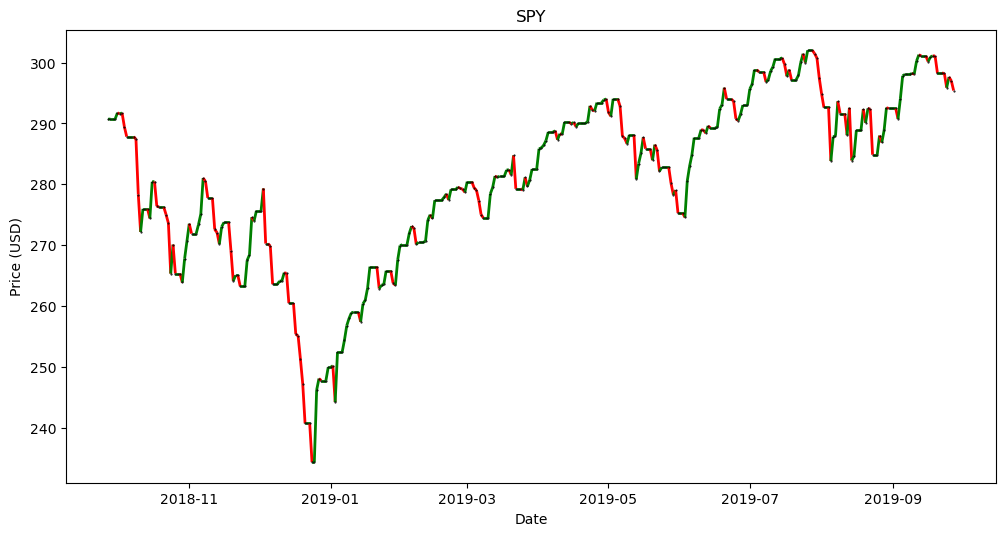

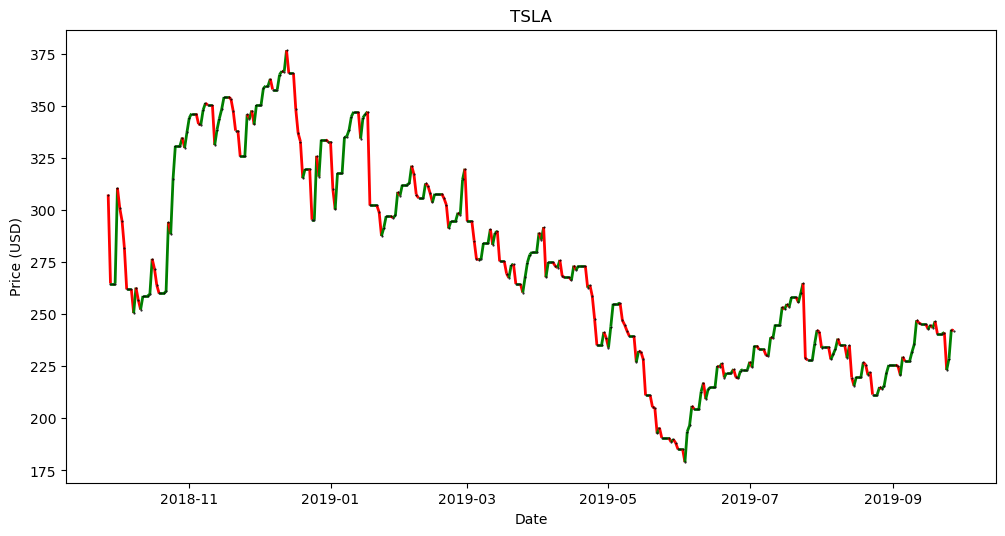

S&P 500 One Year Return:  1.6202827754652653
TSLA One Year Return:  -21.263657648283036


In [23]:
# Start date is from reddit post
generate_results('TSLA', "2018-09-27")

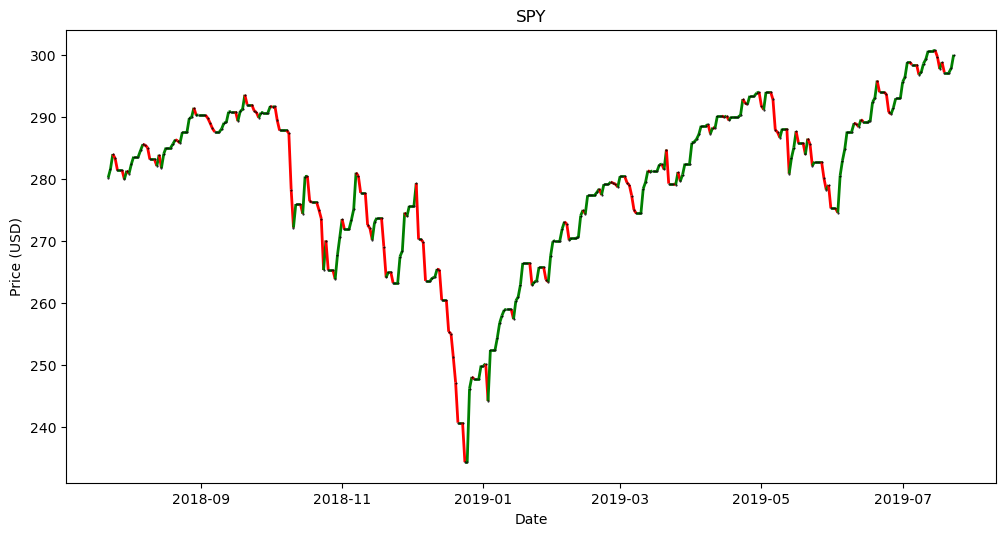

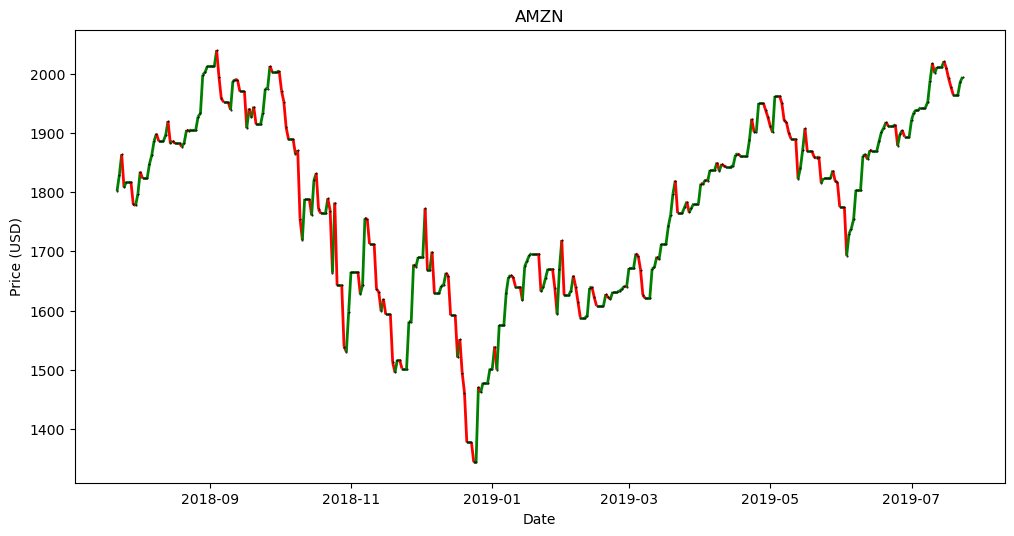

S&P 500 One Year Return:  7.077087794432543
AMZN One Year Return:  10.682019977802442


In [24]:
generate_results('AMZN', "2018-07-23")

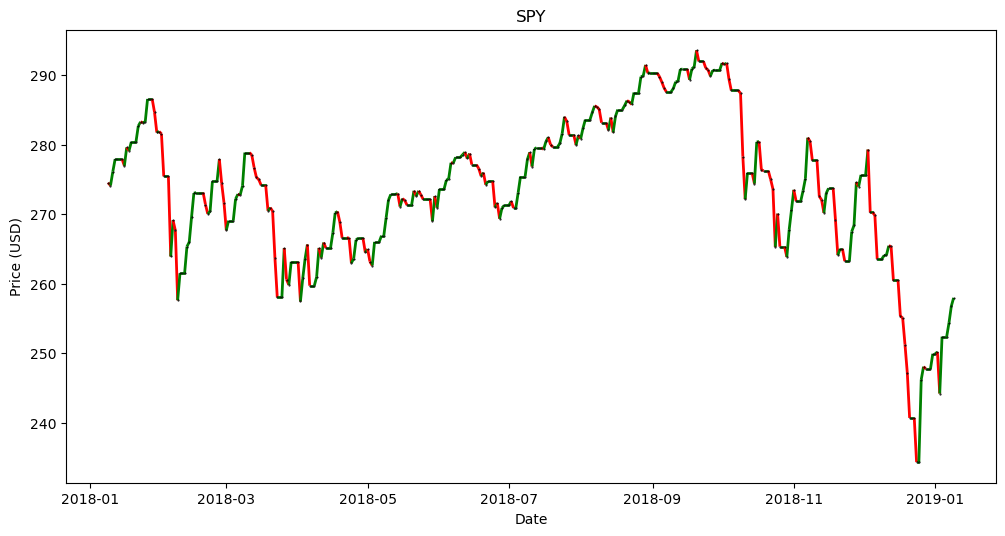

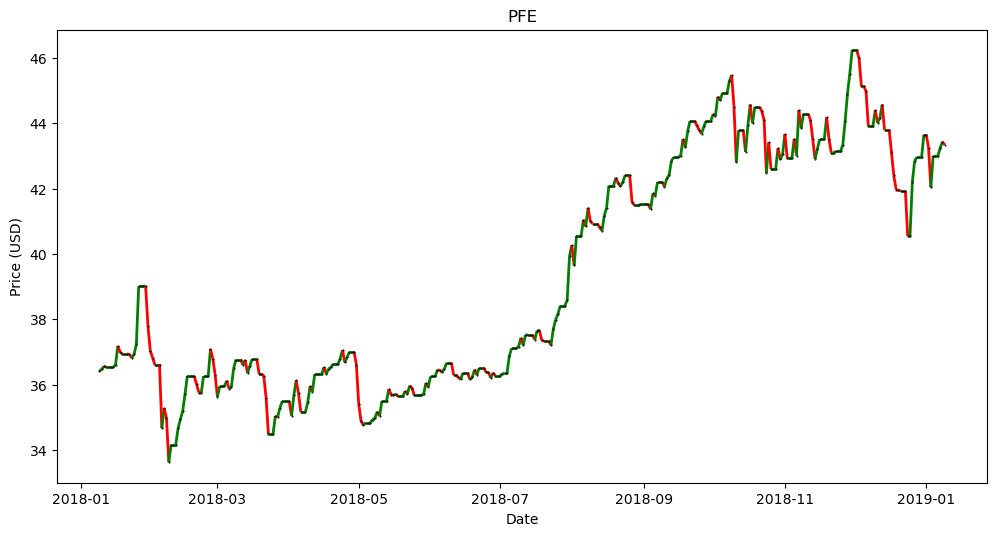

S&P 500 One Year Return:  -6.035550375173013
PFE One Year Return:  19.03323262839881


In [28]:
generate_results('PFE', "2018-01-09")

In [ ]:
from stock_info.annual_return import get_annual_return
from stock_info.pull_stock_info import get_stock_info
import pandas as pd
import os

l = ['SPY', 'TSLA', 'RAD', 'MNK', 'XXII', 'AMZN', 'APPL', 'MARK', 'AC', 'PFE', 'FNKO', 'WU', 'ICPT', 'DVN', 'MRK', 'SNAP', 'MAZDA', 'UVXY', 'MLM', 'CAT', 'AMD', 'ROKU', 'JNJ', 'NFLX', 'FB', 'MATW', 'TRXC', 'SQM', 'FMC', 'NVAX', 'OMER', 'NTNX', 'ULTA', 'EL', 'A', 'H', 'YINN', 'MJX', 'SNE', 'GPRO', 'ROPE', 'ELON', 'MUSK', 'NVDA', 'BOTZ', 'AAPL', 'XIV', 'MNECRFT', 'MCD', 'SQ', 'WM', 'BABA', 'UAL', 'CMG', 'TWTR', 'UBQT', 'RTN', 'WWE', 'YUM', 'HCC', 'AMTD', 'DFEN', 'SVXY', 'LRCX', 'MU', 'BNJ', 'LMT', 'NOC', 'DIS', 'BB', 'BIDU', 'BA', 'NL', 'CROX', 'RGR', 'SWHC', 'GIS', 'WYNN', 'ABBV', 'AOI', 'VXX', 'LULU', 'WEN', 'LFIN', 'GOOLAG', 'B', 'AVAV', 'KO', 'KHC', 'BANANA', 'PLUG', 'TRUMP', 'FCAU', 'LQ', 'EA', 'OPTT', 'WKUK', 'RBR', 'AOBC', 'WB', 'TERP', 'NYSE', 'SBUX', 'KMI', 'FLNT', 'INTU', 'KR', 'HEAR', 'TED', 'ROOF', 'JD', 'SGMO', 'QQQ', 'SPOT', 'WMT', 'NESN', 'DOG', 'CRISPR', 'CRM', 'LUV', 'ATNM', 'MON', 'PTLA', 'PLNT', 'ITEQ', 'GOOGL', 'LVS', 'DPZ', 'NTDOY', 'SHOP', 'AMCX', 'AMC', 'MISH', 'DQ', 'ADBE', 'T', 'IQ', 'OIL', 'SOGO', 'HUYA', 'LUBE', 'WSBQ', 'MSFT', 'BRK', 'INTC', 'VVV', 'TAP', 'DF', 'PGE', 'PPC', 'GIL', 'IMOS', 'FDP', 'CRSP', 'TESLA', 'EVBG', 'BO', 'OB', 'S', 'M', 'UXIN', 'CCL', 'WDC', 'RCL', 'GLD', 'ABB', 'J', 'GD', 'R', 'GLW', 'GALT', 'LII', 'CHGG', 'GPS', 'PYPL', 'V', 'SPX', 'TIGER', 'BJ', 'USO', 'GOOG', 'HOG', 'XLC', 'SOY', 'F', 'RGB', 'VIX', 'PETS', 'FIT', 'BMY', 'LITE', 'OCLR', 'ETSY', 'MSTX', 'YEXT', 'OMI', 'EBIX', 'THO', 'SAUDI', 'LB', 'CANCER', 'DKS', 'HSY', 'DG', 'SUBX', 'DBX', 'TTPH', 'ADMP', 'DVL', 'ATVI', 'WEED', 'CVS', 'COST', 'MELANIA', 'JAGX', 'DNKN', 'CRON', 'NKE', 'TSN', 'FIZZ', 'DDT', 'WBA', 'LAKE', 'ADDYY', 'BHF', 'PVTL', 'HD', 'SAM', 'HLT', 'MAR', 'NWL', 'NIKE', 'TKC', 'NIO', 'HMNY', 'IMDZ', 'INSG', 'RSGE', 'TLRY', 'BX', 'REV', 'SSTI', 'GREC', 'ACB', 'SIX', 'FDX', 'GRUB', 'FL', 'GGAL', 'BFR', 'TGS', 'YPF', 'COKE', 'GERN', 'HEXO', 'JPM', 'TOY', 'MAT', 'ALKS', 'BSTI', 'WIN', 'GE', 'L', 'XMAS', 'ZNGA', 'BELTS', 'PANTS', 'TNDM', 'NAP', 'DVMT', 'TWLO', 'CREG', 'CCIH', 'JMU', 'CLWT', 'TKAT', 'CCCL', 'YECO', 'DELT', 'CNET', 'CNTF', 'CADC', 'BTC', 'TT', 'GNC', 'GS', 'VKTX', 'XLNX', 'PCG', 'BOSH', 'AMAZON', 'JWN', 'KSA', 'REED', 'GSM', 'TITTIES', 'GM', 'MTCH', 'PM', 'UBER', 'AMRN', 'CHKN', 'YETI', 'DS', 'DGLY']

annual_returns = []
for thing in l:
    get_stock_info(thing, "2018-01-01", 365)
    path = (f'stock_info/data/{thing}data.csv')
    if os.stat(path).st_size > 10:
        ar = get_annual_return(path)
        annual_returns.append(ar)

get_stock_info("SPY", "2018-01-01", 365)
path = (f'stock_info/data/SPYdata.csv')
ar = get_annual_return(path)

average_reddit_ar = sum(annual_returns) / len(annual_returns)
print("Average reddit AR: ", average_reddit_ar)
print("S&P 500 AR: ", ar)



sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/YECO/bars 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v2/stocks/JWN/bars 3 more time(s)...


Average reddit AR:  16.920264410529533
S&P 500 AR:  -7.0134315585816855


Our graphs showcase how specific stocks that Reddit recommended or were against compared to the S&P during the same time period. The first company that we checked stock prices for is Tesla. A Redditor believed that the stock prices would dip due to accusations of fraud committed by Elon Musk, and accordingly, the stock price dropped throughout the year. We then checked the stock price for Amazon, a company that a Redditor believed would go up in price through the year. We price did increase, but SPY also followed the price nearly exactly, showing that the change in the stock price is more likely to be due to the overall market changing than anything else. We saw that while occaisionally Redditors were correct, the overall data shows that their predictions would not result in more returns. We also found that big news in the media, including accusations of fraud, have tangible impact on stock prices which did not come to our surprise.

We were able to better see whether /r/wallstreetbets can be a trusted source for stock recommendations. We found that due to the smaller ROI, the subreddit should not be a place to take information from to make investments, though some recommendations result in net gain.

# Conclusion

In 2018, Redditors’ advice did not outperform the S&P, with an average return on investment of 1.44%, as opposed to the S&P500’s ROI of 3.65%. This ROI is an in accordance with what is expected for the S&P, as its average of 10% is still noticeably greater than the investments of Redditors. This means that the subreddit /r/wallstreetbets is not a reliable source of information a lot of the time, failing to outperform the overall market. It is still important to go into investing being prepared to lose money, as no investment is a guarantee. 

The implications of our work can revolve around the effects it can have on large hedge funds, which are suffering the most from the subreddit's success as more people try to bet against the funds and subvert their expectations. If more people begin relying on the subreddit as many have begun doing, the hedge funds will continue to see losses and have to continue being bailed out as they were by Robinhood earlier in 2021. It is important to recognize that these hedge funds make lots of money off of the everyday person losing, so once the tables are turned, they still always find ways to turn the game in their favor.

We learned a lot about the importance and usage of APIs. We also learned how helpful it can be to have people approaching the same problem from two sides. To use our stock data with our Reddit data, one member tried to work on getting the Reddit data into a format that is usable while another worked on creating a function to take in Reddit data and plug it into the Alapaca Market API. As multiple people were working on the same problem, we were able to finish much faster.

The most challenging part of our project was definitely obtaining Reddit data. Our original goal was to pull Tweets, but we were not able to obtain as much Twitter data as we needed, so we pivoted to using Reddit. After a failed attempt at using the Reddit API, then another attempt with Pushshift API resulting in not nearly enough data, we weren't sure where to go next. Luckily, we found the Pushshift Wrapper and were able to get all the data we needed, though it meant needing to sort the data by date as the wrapper did not output ordered posts.

Given more time, we would have loved to implement a virtual investment program that would put virtual money into stocks recommended by Reddit versus investing in the S&P500. Additionally, we would like to have searched for stocks that people predicted to decrease in price by searching for the keyword "short". We would also like to implement this function for other years outside of 2018. It would be interesting to see how COVID affected predictions as well as the stock market, as that is when a lot of the media buzz truly started about /r/wallstreetbets.